In [1]:
from collections import defaultdict
from typing import List

import os
import numpy as np

In [2]:
data_path = "../data/part1"

interferences = ["ibench-l1i", "ibench-l2", "ibench-l1d", "no_interference", "ibench-llc", "ibench-membw", "ibench-cpu"]

In [3]:
results = defaultdict(list)

for interference in interferences:
    i = 0
    interference_path = f"{data_path}/{interference}"
    
    # Continue until the file doesn't exist
    while True:
        file_path = f"{interference_path}/mcperf_results{i}.txt"
        
        if not os.path.exists(file_path):
            break
        
        try:
            with open(file_path) as f:
                lines = f.readlines()
                results[interference].append(lines)
                
            print(f"Loaded {file_path}")
        except FileNotFoundError:
            # Alternative way to break if the file doesn't exist
            break
            
        i += 1

Loaded ../data/part1/ibench-l1i/mcperf_results0.txt
Loaded ../data/part1/ibench-l1i/mcperf_results1.txt
Loaded ../data/part1/ibench-l1i/mcperf_results2.txt
Loaded ../data/part1/ibench-l2/mcperf_results0.txt
Loaded ../data/part1/ibench-l2/mcperf_results1.txt
Loaded ../data/part1/ibench-l2/mcperf_results2.txt
Loaded ../data/part1/ibench-l1d/mcperf_results0.txt
Loaded ../data/part1/ibench-l1d/mcperf_results1.txt
Loaded ../data/part1/ibench-l1d/mcperf_results2.txt
Loaded ../data/part1/no_interference/mcperf_results0.txt
Loaded ../data/part1/no_interference/mcperf_results1.txt
Loaded ../data/part1/no_interference/mcperf_results2.txt
Loaded ../data/part1/ibench-llc/mcperf_results0.txt
Loaded ../data/part1/ibench-membw/mcperf_results0.txt
Loaded ../data/part1/ibench-cpu/mcperf_results0.txt
Loaded ../data/part1/ibench-cpu/mcperf_results1.txt
Loaded ../data/part1/ibench-cpu/mcperf_results2.txt


In [4]:
def extract_column(lines : List[str], col) -> List:
    """
    Extract the p95 value from the given lines of text.
    """
    # Assuming the first line is the header
    header = lines[0]
    col_idx = header.split().index(col)

    return np.array([float(line.strip().split()[col_idx]) for line in lines if line.startswith("read")])

In [5]:
results_p95 = {k: [extract_column(v, 'p95') for v in values] for k, values in results.items()}
results_QPS = {k: [extract_column(v, 'target') for v in values] for k, values in results.items()}

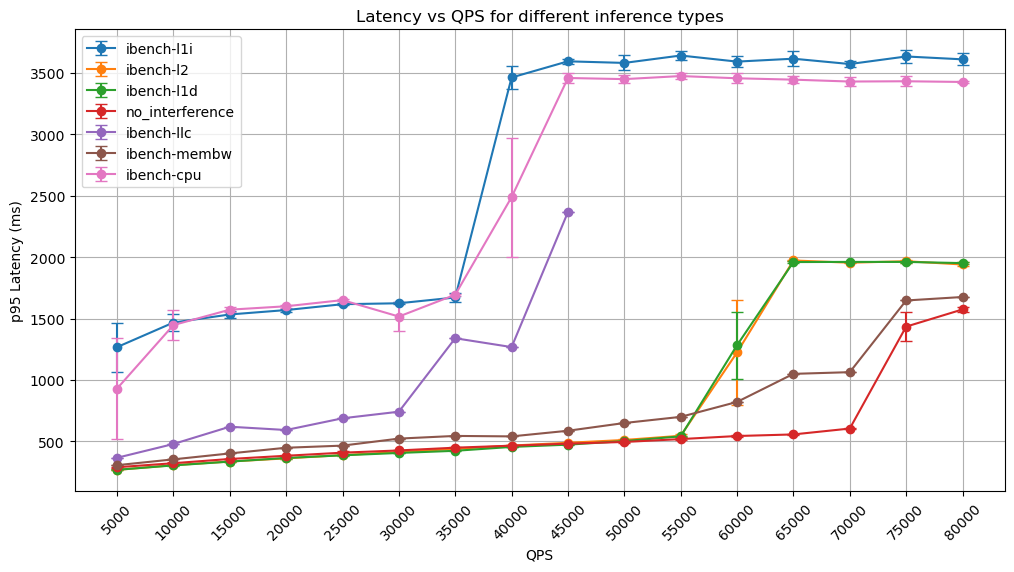

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for interference in results_p95.keys():

    p95_values = results_p95[interference]
    qps_values = results_QPS[interference]

    try:
        p95_mean = np.mean(p95_values, axis=0)
        p95_std = np.std(p95_values, axis=0)
    except ValueError:
        p95_mean = p95_values[0]
        p95_std = np.zeros_like(p95_values[0])

    plt.errorbar(qps_values[0], p95_mean, yerr=p95_std, marker='o', capsize=4, label=interference)

plt.title("Latency vs QPS for different inference types")
plt.xlabel("QPS")
plt.xticks(qps_values[0], rotation=45)
plt.ylabel("p95 Latency (ms)")
plt.grid()
plt.legend()
plt.show()